In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import axes3d
import torch
import torch.nn as nn
%matplotlib notebook
from AngularCentralGauss_torch import AngularCentralGaussian
from Watson_torch import Watson

## 2D Directional

In [86]:
W_2D = Watson(p=2)
W_2D.kappa = nn.Parameter(torch.tensor([50.]))
ACG_2D = AngularCentralGaussian(p=2)
ACG_2D.L_under_diag = nn.Parameter(torch.ones(2,2))
ACG_2D.L_diag = nn.Parameter(torch.tensor([21.,2.5]))

(6284,)


<IPython.core.display.Javascript object>


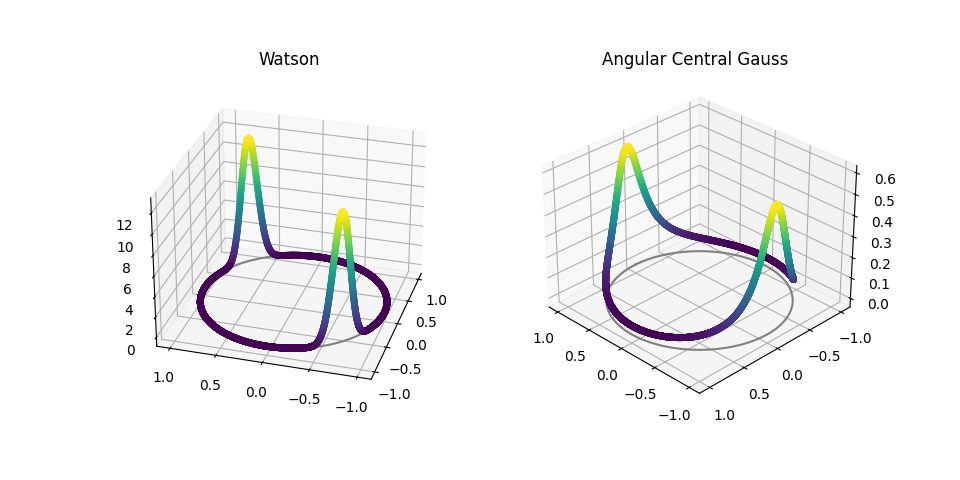

In [87]:
phi = torch.arange(0, 2 * np.pi, 0.001)
phi_arr = np.array(phi)
x = torch.column_stack((torch.cos(phi), torch.sin(phi)))

Wpoints = torch.exp(W_2D(x))
ACGpoints = torch.exp(ACG_2D(x))
Wprops = np.array(Wpoints.squeeze().detach())
ACGprops = np.array(ACGpoints.squeeze().detach())

print(Wprops.shape)
fig = plt.figure(figsize=plt.figaspect(0.5))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot(np.cos(phi_arr), np.sin(phi_arr), 0, 'gray')
ax.scatter(np.cos(phi_arr), np.sin(phi_arr), Wprops, c=Wprops, cmap='viridis', linewidth=0.5)
ax.set_title('Watson')
ax.view_init(30, 135)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot(np.cos(phi_arr), np.sin(phi_arr), 0, 'gray')
ax.scatter(np.cos(phi_arr), np.sin(phi_arr), ACGprops, c=ACGprops, cmap='viridis', linewidth=0.5)
ax.set_title('Angular Central Gauss')
ax.view_init(30, 135)
plt.show()

### On a sphere - 3D

In [88]:
ACG_3D = AngularCentralGaussian(p=3)
W_3D = Watson(p=3)
W_3D.kappa = nn.Parameter(torch.tensor([10.]))

<IPython.core.display.Javascript object>


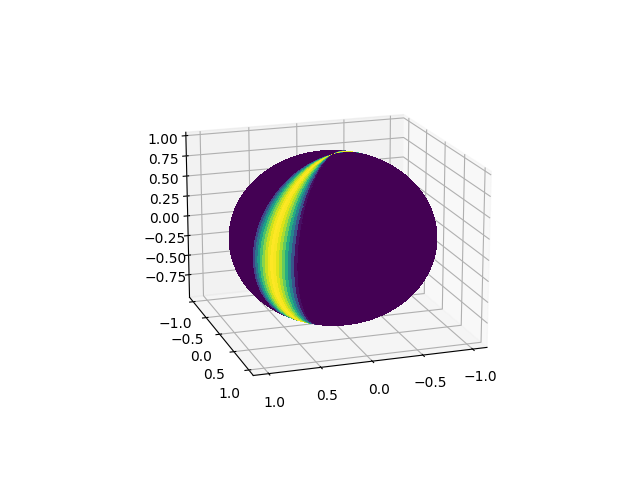

In [89]:
u = np.linspace(0, 2*np.pi, 100)
v = np.linspace(0, np.pi, 100)
#print(u)
ro = 1


ui = np.linspace(0, 2 * np.pi, 100)
vi = np.linspace(0, np.pi, 100)

ri = 1
x = ri * np.outer(np.cos(ui), np.sin(vi))
y = ri * np.outer(np.sin(ui), np.sin(vi))
z = ri * np.outer(np.ones(np.size(ui)), np.cos(vi))

y = ro * np.outer(np.sin(u), np.sin(v))
x = ro * np.outer(np.sin(u), np.cos(v))
z = ro * np.outer(np.cos(u), np.ones_like(v))





uit = torch.tensor(ui,dtype=torch.float)

vit = torch.tensor(vi,dtype=torch.float)
r = 1
xp = r * torch.sin(uit)*torch.cos(vit) 
yp = r * torch.sin(uit)*torch.sin(vit)
zp = r * torch.cos(uit)

x3D = torch.column_stack((xp,yp,zp))


fig = plt.figure()
ax = plt.axes(projection='3d')
prop = np.array(W_3D(x3D).detach())

propsphere = np.outer(np.ones(np.size(prop)), prop)
data = propsphere/np.max(propsphere)

ax.plot_surface(x, y, z,rstride=1, cstride=1,  linewidth=0, facecolors=cm.viridis(data),antialiased=False, shade=False)
#surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=cm.jet(N), linewidth=0, antialiased=False, shade=False)

#plt.show()